# Annotationen auswerten mit GitMA 4

Wenn Sie in CATMA (Gius et al. 2020) mit Ihrem Team kollaborativ annotiert haben, so interessiert es Sie vielleicht, wie hoch die Übereinstimmung der Annotator:innen miteinander ist. Eine solche Übereinstimmung (auch Inter Annotator Agreement oder kurz IAA genannt) kann auf unterschiedliche Weisen berechnet werden. GitMA bietet insgesamt vier Varianten der Berechnung eines IAAs für zwei oder mehr Annotator:innen an: Scott's pi, Cohen's kappa, Krippendorf's alpha (vgl. [Artstein und Poesio](https://doi.org/10.1162/coli.07-034-R2) und das Gamma-Agreement (vgl. [Mathet et al.](https://doi.org/10.1162/COLI_a_00227)). Die ersten drei IAA-Varianten können mit dem Python Package *Natural Language Toolkit* (Bird et al.) berechnet werden, die vierte mit dem *pygamma-agreement* (Titeux und Riad 2021). Bei der Berechnung von Gamma wird mit einbezogen, dass die Einheiten, die annotiert werden von den Annotator:innen individuell gewählt werden können. In CATMA kann gänzlich individuell annotiert werden, d.h. es können Buchstabenkombinationen, Wörter, Phrasen, Satzteile, Sätze, freie Passagen oder Absätze usw. annotiert werden und das auch noch auf verschiedene Weisen überlappend (vgl. Horstmann 2019, §44). Darum kann es entscheidend sein, bei der Berechnung des IAA das sogenannte *Unitizing*, also die Variabilität der Units/Einheiten, zu berücksichtigen. Leider gibt es für die Berechnung des IAA keine Standard-Variante, die für alle Arten von Annotationsprojekten empfohlen werden kann (vgl. Pagel et al.). Stattdessen muss individuell entschieden werden, welcher Wert genau berechnet werden soll.

Wir empfehlen, jeweils eine Annotation Collection pro Annotator:in und Dokument anzulegen. Am besten wird jede Annotation Collection so benannt, dass <span style="color:pink">Titel</span>, <span style="color:red">Annotationsaufgabe</span> und <span style="color:green">Annotator:in</span> enthalten sind.

**Zum Beispiel:**  <span style="color:pink">Robinson_Crueso</span>-<span style="color:red">narrativer_Raum</span>-<span style="color:green">Mareike</span>

## Inhalt
* [1. CATMA-Projekt laden](#1-bullet)
* [2. Einführung in die Funktion get_iaa()](#2-bullet)
 * [2.1 Allgemeines Beispiel](#3-bullet)
 * [2.2 Nach Annotationskategorien filtern](#4-bullet)
 * [2.3 Annotationen mit Properties vergleichen](#5-bullet)
* [3. Das Gamma-Agreement berechnen](#6-bullet)

## 1. CATMA-Projekt laden <a class="anchor" id="1-bullet"></a>

Für diese Lerneinheit haben wir ein Beispielprojekt vorbereitet, das Annotationen von zwei Annotatoren zu Kafkas *Urteil* enthält. Wenn Sie mit eigenen Daten arbeiten wollen, so können Sie diese aus Ihrem CATMA-Account herunterladen. Wie Sie das tun können, erfahren Sie im ersten Notebook (Annotationen auswerten mit GitMA 1) zu dieser Lerneinheit. Wenn Sie das Demo-Projekt nutzen möchten, so klicken Sie nun einfach in die folgende Box und dann oben im Menü auf "Run".

Wenn Sie mit eigenen Daten arbeiten möchten, müssen Sie den Code leicht anpassen. Schreiben Sie in die einfachen Anführungsstriche hinter "project_name", in denen jetzt "test_corpus" steht, den Namen Ihres CATMA-Projektes. Hinter "project_directory" müssen Sie den Dateipfad angeben, der zu dem Ordner auf Ihrem Computer führt, in dem das CATMA-Projekt abgelegt wurde. Ersetzen Sie "../test/demo_project/" durch den Dateipfad, den Sie im ersten Notebook dieser Lerneinheit als "backup_directory" angegeben haben.

In [ ]:
# import the CatmaProject class
from gitma import CatmaProject

# load your project
my_project = CatmaProject(
    project_name='test_corpus',
    project_directory='../test/demo_project/'
)

## 2. Einführung in die Funktion `get_iaa()` <a class="anchor" id="2-bullet"></a>

Im Demo Projekt für diese Lerneinheit gibt es einen Text mit insgesamt drei Annotation Collections. Das Inter-Annotator-Agreement wird für zwei dieser Annotation Collections errechnet (die Annotation Collection wurden als "ac_1" und "ac_2" benannt). 

Mit der Funktion `get_iaa` wird für jede Annotation in einer Annotation Collection die am besten passende Annotation in einer zweiten Collection gesucht. Der Vergleich basiert auf der annotierten Testpassage, also auf der Annotationsspanne. Die folgenden Grafiken verdeutlichen, wie Annotationen ausfindig gemacht werden, die zueinander passen (vgl. Abb 1).

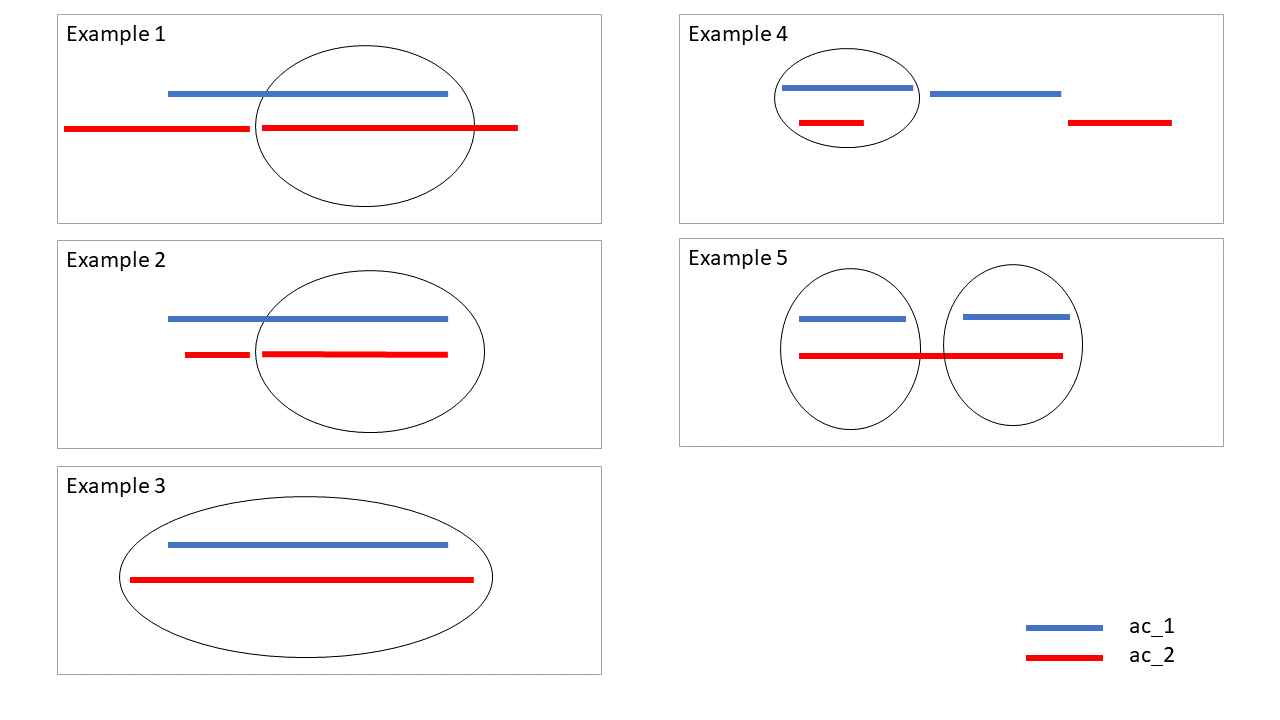
**Abb. 1: Unterschiedlich gut zueinander passende Annotationen**

Von allen Annotationen werden bei den IAA-Varianten, die mit dieser Funktion berechnet werden können, immer nur die berücksichtigt, die am besten passt.  

### 2.1 Allgemeines Beispiel <a class="anchor" id="3-bullet"></a>

Wenn Sie zunächst einmal die Annotationsspannen in zwei Annotation Collections vergleichen wollen, so können Sie das mithilfe einer Visualisierung tun. Die Annotationsspannen werden dabei anhand ihrer Anfangspunkte verglichen. Wenn Sie mit dem Demo-Projekt arbeiten, so klicken Sie dazu einfach in die nächste Box, um diese auszuwählen und gehen dann oben im Menü auf "Run". 

Wenn Sie mit eigenen Daten arbeiten, so ersetzen Sie in der eckigen Klammer die Namen der Annotation Collections aus dem Demo-Projekt durch die aus Ihrem eigenen CATMA-Projekt. Wenn Sie mehr als zwei Annotation Collections vergleich wollen, so setzen Sie die Reihe fort durch Namen weiterer Annotation Collections in einfachen Anführunghsstrichen, die durch Kommas getrennt werden.

In [ ]:
my_project.compare_annotation_collections(
    annotation_collections=['ac_1', 'ac_2']
)

Wie die Visualisierung oben zeigt, gibt es für jede Annotation in der ersten Annotatione Collection eine passende in der zweiten. Im nächsten Schritt berechnen wir nun die Übereinstimmung für alle passenden Annotationen. Klicken Sie dazu in die nächste Box und dann oben auf "Run". Wenn Sie mit eigenen Annotationsdaten arbeiten, vergessen Sie nicht, die Namen der Annotation Collections durch die Ihrer eigenen zu ersetzen. Auch hier können Sie weitere Annotation Collections hinzufügen. Setzen Sie dazu einfach ein Komma hinter die zweite Zeile und fügen Sie eine weitere Zeile der Form 

<div class="alert alert-block alert-warning">
ac3_name=''
</div>

ein. Auf diese Weise können Sie so viele Annotation Collections hinzufügen wie Sie wollen.

In [ ]:
my_project.get_iaa(
    ac1_name='ac_1',
    ac2_name='ac_2'
)

<div class="alert alert-block alert-info">
<b>Aufgabe 8</b> Wie Sie sehen, gibt Ihnen diese Funktion drei Varianten des IAAs aus. Welche Informationen erhalten Sie darüber hinaus zur Übereinstimmung der Annotationen? Vergleichen Sie die ausgegebene Tabelle mit der Visualisierung, die Sie vorhin erstellt haben und den Beispielen für passende Annotationen. Für welche drei statischen Events gibt es passende Annotationen in der zweiten Annotation Collection und welchem Beispiel für passende Annotation entspricht das?
</div>

### 2.2 Nach Annotationskategorien filtern <a class="anchor" id="4-bullet"></a>

Wenn Sie nicht für alle Annotationskategorien in Ihren Annotation Collections die Übereinstimmung der Annotationen berechnen wollen, sondern nur für ausgewählte Tags, so können Sie das mit dem folgenden Code tun. Möchten Sie das Demo-Projekt nutzen, so können Sie wie gewohnt den Code ausführen, indem Sie unten stehende Box auswählen und dann auf "Run" klicken. Sie bekommen dann eine Analyse des Tags "process". 

Wenn Sie eigene Daten nutzen, tauschen Sie wieder die Namen der Annotation Collections aus. Wie im voran gegangenen Schritt können Sie auch hier wieder weitere Annotation Collections in weiteren Zeilen ergänzen. Ändern Sie dann den Namen des Tags in den eckigen Klammern bei "tag_filter" und tragen Sie hier den Namen einer Ihrer eigenen Annotationskategorien ein. Wenn Sie weitere Tags berücksichtigen möchten, so ergänzen Sie in den eckigen Klammern einfach weitere Namen von Tags aus Ihren Annotation Collections. Setzen Sie dabei jeden Tagnamen in einfache Anführungsstriche und setzen Sie Kommas dazwischen.

In [ ]:
my_project.get_iaa(
    ac1_name='ac_1',
    ac2_name='ac_2',
    tag_filter=['process']
)

<div class="alert alert-block alert-info">
<b>Aufgabe 9</b> In der Abfrage berücksichtigen Sie nur eine Annotationskaqtegorie (process). Wie erklären Sie sich, dass hier trotzdem in der Tabelle auch die andere Annotationskategorie auftaucht? Tipp: Berücksichtigen Sie bei Ihrer Antwort auch die Visualisierung und die grafischen Beispiele für passende Annotationen!
</div>

Sie können diesen Effekt herausnehmen, indem Sie nicht nur von einer Annotation Collection als Basis ausgehen, sondern den Filter, der nur bestimmte Tags in die Berechnungen einbezieht, auf beide Annotation Collections ausweiten. Nutzen Sie dazu den folgenden Code wie gehabt unverändert, wenn Sie das Demo-Projekt nutzen wollen oder passen Sie ihn wie oben an, wenn Sie eigene Daten nutzen. 

In [ ]:
my_project.get_iaa(
    ac1_name='ac_1',
    ac2_name='ac_2',
    tag_filter=['process'],
    filter_both_ac=True
)

Wie Sie sehen, wird nun in der vierten Zeile des Ergebnisses angezeigt, dass für eine Annotation keine passende in der zweiten Annotation Collection gefunden wurde. Trotzdem sind die Übereinstimmungwerte dieselben wie in der obigen Berechnung. Das liegt daran, dass es in unserem Demo-Projekt nur zwei unterschiedliche Tags gibt. Wenn Sie mit eigenen Daten arbeiten, können die Ergebnisse ganz anders aussehen. 

### 2.3 Annotationen mit Properties vergleichen <a class="anchor" id="5-bullet"></a>

In CATMA können Sie für jede Annotationskategorie eine oder mehrere Eigenschaften (Propertys) angeben, die zwei oder mehr Ausprägungen (Values) haben können. Tags sind also nur eine Ebene von CATMA-Annotationen und natürlich können Sie auch Propertys und Values in die Berechnung des Inter-Annotator-Agreements einbeziehen. In unserem Beispielprojekt gibt es die Property "mental", die immer dann verwendet wird, wenn ein im Text dargestelltes Ereignis nicht tatsächlich (innerhalb der erzählten Welt) stattfindet, sondern nur in der Vorstellung einer Figur (mental event). Auch hier erstellen wir zunächst wieder eine Visualisierung, um uns die Übereinstimmung grafisch vor Augen zu führen. Um dies mit den Demo-Daten zu tun, müssen Sie wieder nichts anderes tun als die nächste Box auswählen und auf "Run" klicken. 

Wenn Sie eigene Daten nutzen, so passen Sie wieder wie gehabt die Namen der Annotation Collections in den eckigen Klammern an. Damit die Nutzung der Propertys farblich dargestellt wird, geben Sie bei "color_col" in die einfachen Anführungsstriche den Namen der Property ein, deren Nutzung Sie analysieren wollen.


In [ ]:
my_project.compare_annotation_collections(
    annotation_collections=['ac_1', 'ac_2'],
    color_col='prop:mental'
)

Um nun die mathematische Berechnung des Agreements durchzuführen, nutzen Sie einen sogenannten "Level"-Parameter. Um die Funktion mit den Beispieldaten auszuführen, können Sie sie einfach wieder wie gehabt starten ohne etwas im Code zu verändern.

Möchten Sie die Berechnung mit eigenen Daten durchführen, passen Sie auch hier wieder die Namen der Annotation Collections an. Ersetzen Sie dann noch "mental" durch den Namen der Property aus Ihrer Annotation Collection, sodass die Zeile in etwa so aussieht:

<div class="alert alert-block alert-warning">
level='prop:Name_Ihrer_Property''
</div>

In [ ]:
my_project.get_iaa(
    ac1_name='ac_1',
    ac2_name='ac_2',
    level='prop:mental'
)

An diesem Beispiel zeigt sich sehr gut, dass diese Art, die Übereinstimmung zu berechnen Uneinigkeiten außer Acht lässt, sofern diese nicht die am besten zueinander passenden Annotationen betreffen. Bei der letzten Annotation aus der ersten Annotation Collection wird die nicht-übereinstimmende Annotation aus der zweiten Collection nicht berücksichtigt, weil es sich dabei nicht um die am besten zu der Annotation aus "ac_1" passenden Annotation handelt. Wenn also unterschiedliche Annotationsspannen eine große Rolle spielen, so empfehlen wir die Berechnung des Gamma-Agreements.

## 3. Das Gamma-Agreement berechnen <a class="anchor" id="6-bullet"></a>

Um das Gamma-Agreement zu berechnen, müssen Sie zusätzlich zu den Annotation Collections noch 5 weitere Parameter definieren:

- alpha: Koeffizient zur Gewichtung der Unähnlichkeit von Annotationen im Hinblick auf deren Position (default-Wert ist 1)
- beta: Koeffizient zur Gewichtung der Unähnlichkeit von Annotationen im Hinblick auf deren Annotationskategorie (default-Wert ist 1)
- delta_empty: Bewertung der Unähnlichkeit im Hinblick auf Leerstellen, d.h. wenn eine Textpassage von einem Annotator / einer Annotatorin anntiert wurde und vom anderen nicht (default-Wert ist 1)
- n_samples: Anzahl der zufällig gewählten Textabschnitte, die genutzt werden, um einen erwarteten Gamma-Wert zu berechnen (im Beispiel werden 30 genutzt)
- akzeptierte Fehleranfälligkeit bei der Berechnung des erwarteten Gamma-Wertes (kann als "high"=1%, "medium"=2% oder "low"=5% spezifiziert werden)

Weitere Erklärungen zur Berechnung des Gamma-Agreements finden Sie in der Dokumentation (vgl. [Mathet et al. 2015](https://watermark.silverchair.com/coli_a_00227.pdf?token=AQECAHi208BE49Ooan9kkhW_Ercy7Dm3ZL_9Cf3qfKAc485ysgAAAsIwggK-BgkqhkiG9w0BBwagggKvMIICqwIBADCCAqQGCSqGSIb3DQEHATAeBglghkgBZQMEAS4wEQQMyMMaVYZBoX9znulIAgEQgIICdcXaIROcjaVrG686Y8MbKCDLINhO9N1vw5uOJOJShc3XANoIUnzebJcOwEmQLXo-sEfzscvk3C0fxSz6FN366vSE6P1rxte_YRurfJzgCMaiUz92Xh4Texplkgm0ihcRCXL3mw6vBbVSzV3WmfKGV3pyOJbOZrFoY5SMS8Oak1z6Ox8cg7dy2nvNJnn7m_ZV29R1s7z-CShjXX6re2jX6Nm4iSeQTqfDU5z8_TEH-G7Q61jT7AF-VAcsLC9r91AgDYssNNnEGodmgQOcSNSROAbWyyRAbURaHKaJPdfwuFqKQ873U7LhMV8Qu8gyP1tSMKBBT59eccs129r6q9aeJVA7LwvjRoY5XLlINwRetXkX6haJmfrza5jCJ0o6fNXk5w_p-_J_pcpzw0usY9J1nErEPG_ugW2aGmOh4pLgP1r9Bi77BtRMzN-q20TblioMiffKDBjkn9tDs83XeFxRNq9GsCZRLs8BXeFa9aefnzeTRgSRDop6kVXDmZQBpcBaxMaZuGtLP1Y4HMfbB2za6cBk2HzPtTvoRjaxqXUZ9WkkXXy6_MUWDOWjLe5CWG2wXWQrEQfCfvd5xmT29f6b6GxWh-80skkLCzcMDWz_rTQceex7L1l4gBvU5A0ChUK54kv_Xw9XjOkVTbYYXQDdiqaxFttNty_mWzJwcRpEyLAdCTMRBjpqRzBdYywtsrsQPHINFGK7NkkKkx_weGI7um5BiOT78C29wqshiADF-wKVG0mFQbPzfVpddgfvgjxQZ9bfKrI-HwkOttHV4I9U7YACHOrbC4iSSyO98oEc7dYpKBqowB7ypHarLP298TwEzfqOdww0))

Auch hier können Sie wieder unsere Demo-Daten für die Berechnung nutzen. Dafür müssen Sie den Code in der folgenden Box unangepasst ausführen. Wenn Sie mit eigenen Daten arbeiten, passen Sie auch hier wieder die Namen der Annotation Collections so an, dass Sie denen entsprechen, die Sie in die Berechnung einbeziehen wollen.

In [ ]:
# gamma agreement with default settings
my_project.gamma_agreement(
    annotation_collections=['ac_1', 'ac_2'],
    alpha=1,
    beta=1,
    delta_empty=1,
    n_samples=30,
    precision_level=0.01
)

Wenn Sie mit weiteren, hier nicht aufgeführten Varianten das Inter-Annotator-Agreement berechnen wollen, so können Sie dafür Rohdaten aus Ihrem CATMA-Projekt generieren. Mit dem unten stehenden Code können Sie diese als CSV-Tabelle speichern.

Nutzen Sie auch hier unser Demo-Projekt, indem Sie den nächsten Code unverändert ausführen. Passen Sie Folgendes an, um mit eigenen Daten zu arbeiten: Die Namen der Annotation Collections (wie gehabt), den Dateipfad, unter dem die Tabelle gespeichert werden soll. Ändern Sie dazu die Angabe "../test/pygamma_table.csv" so ab, dass hier der Pfade steht, unter dem Ihre Version der Tabelle in der Ordnerstruktur Ihres Rechners abgelegt werden soll. 

In [ ]:
pygamma_df = my_project.pygamma_table(
    annotation_collections=['ac_1', 'ac_2']
)

# save
pygamma_df.to_csv('../test/pygamma_table.csv', index=False, header=False)

# show example
pygamma_df.head(5)

In den insgesamt vier Teilen dieser Lerneinheit haben Sie gelernt, wie Sie ein CATMA-Projekt klonen und lokal speichern, Ihre Annotationsdaten analysieren, Goldstandard-Annotationen erstellen und in Ihr CATMA-Projekt zurückladen und das Inter-Annotator-Agreement in unterschiedlichen Varianten berechnen. Damit haben Sie den praktischen Teil dieser Lerneinheit abgeschlossen. Kehren Sie nun zum Artikel "CATMA-Annotationen auswerten, Gold Standard erstellen und Inter-Annotator-Agreement berechnen mit GitMA" auf der forTEXT-Webseite zurück, um die Lösungen zu den Augaben einzusehen. Dort finden Sie auch ein Verzeichnis der genutzten Literatur.